In [215]:
import numpy as np
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [216]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size,activation):
        super(SimpleNN, self).__init__()
        self.first_linear = nn.Linear(input_size, input_size // 2)
        self.second_linear = nn.Linear(input_size // 2, output_size)

        self.activation = activation
    
    def forward(self, x):
        out = self.first_linear(x)
        out = self.activation(out)
        out = self.second_linear(out)
        
        return out

In [217]:
batch_size = 128
input_size = 28 * 28
output_size = 10
num_epochs = 50
learning_rate = 1e-3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [218]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=[0.3081,],std=[0.1306,])])
train_dataset = datasets.MNIST(root='./data', 
                               train=True, 
                               transform=transform,
                               download=True)

test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transform)


In [219]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [220]:
act=['Sigmoid' ,'ReLU','ELU','Tanh']
act_func = [nn.Sigmoid(), nn.ReLU(), nn.ELU(), nn.Tanh()]

In [ ]:
#Traning the models with diffrent activation fun 



In [221]:
train_losses = {"Sigmoid":[],'ReLU':[],'ELU':[],'Tanh':[]}
test_losses = {"Sigmoid":[],'ReLU':[],'ELU':[],'Tanh':[]}

train_accs = {"Sigmoid":[],'ReLU':[],'ELU':[],'Tanh':[]}
test_accs = {"Sigmoid":[],'ReLU':[],'ELU':[],'Tanh':[]}

In [ ]:
models=[1,1,1,1]
j=-1
for activation in act_func:
    j+=1
    models[j] = SimpleNN(input_size, output_size,activation)
    models[j].to(device)
    ce_loss = nn.CrossEntropyLoss()
    optimizer=torch.optim.Adam(models[j].parameters(), lr=learning_rate)
    for epoch in range(num_epochs):
      agg_train_loss = 0
      agg_test_loss = 0

      agg_train_correct = 0
      agg_test_correct = 0

      # Training
      models[j].train(True)
      for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        images = images.view(images.shape[0], -1)

        # Forward + Backward + Optimize
        models[j].zero_grad()
        outputs = models[j](images)
        loss = ce_loss(outputs, labels)
        loss.backward()
        optimizer.step()

        agg_train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        agg_train_correct += (predicted == labels).sum()
        
        
      
      train_losses[act[j]].append(agg_train_loss / len(train_loader))
      train_accs[act[j]].append(agg_train_correct / len(train_dataset))

      # Testing
      models[j].train(False)
      with torch.no_grad():
        for i, (images, labels) in enumerate(test_loader):
          images = images.to(device)
          labels = labels.to(device)

          images = images.view(images.shape[0], -1)

          # Forward only
          outputs = models[j](images)
          loss = ce_loss(outputs, labels)

          agg_test_loss += loss.item()

          _, predicted = torch.max(outputs.data, 1)
          agg_test_correct += (predicted == labels).sum()
      
      test_losses[act[j]].append(agg_test_loss / len(test_loader))
      test_accs[act[j]].append(agg_test_correct / len(test_dataset))
      print(f'Epoch [{epoch+1}/{num_epochs}], Train loss: {train_losses[act[j]][-1]:.2f}, Acc. {train_accs[act[j]][-1]:.2f}; Test loss: {test_losses[act[j]][-1]:.2f}, Acc. {test_accs[act[j]][-1]:.2f}')

In [ ]:
#compering between diffrent activation fun by grafh


In [ ]:

def plot_act_func_results(results=[], activation_functions = []):
    plt.figure(figsize=(10,10))
    plt.style.use('dark_background')
    
    # Plot validation accuracy values
    for act_func in train_losses:
        plt.plot(test_accs[act_func])
        
    plt.title('Model accuracy')
    plt.ylabel('Test Accuracy')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

    
    plt.figure(figsize=(10,10))
    for act_func in test_losses:
        plt.plot(test_losses[act_func])
        
    plt.title('Model loss')
    plt.ylabel('Test Loss')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

    for act_func in train_losses:
        plt.plot(train_losses[act_func])
        
    plt.title('Model loss')
    plt.ylabel('Train Losses')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

    for act_func in train_accs:
        plt.plot(train_accs[act_func])
        
    plt.title('Model accuracy')
    plt.ylabel('Train Accuracy')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

   
plot_act_func_results([train_losses,test_losses,train_accs,test_accs],act)


In [ ]:
#compering the accuracy on the test set between diffrent activation function in the final model 

In [ ]:
final_loss={"Sigmoid":int,'ReLU':int,'ELU':int,'Tanh':int}
for act_func in test_losses:
  final_loss[act_func]=test_losses[act_func][-1]
print(final_loss)      

{'Sigmoid': 0.08425121864394573, 'ReLU': 0.1700253376924472, 'ELU': 0.20758811251384432, 'Tanh': 0.09615742560690475}


In [ ]:
final_acc={"Sigmoid":int,'ReLU':int,'ELU':int,'Tanh':int}
for act_func in test_accs:
  final_acc[act_func]=test_accs[act_func][-1]
print(final_acc)

{'Sigmoid': tensor(0.9746), 'ReLU': tensor(0.9811), 'ELU': tensor(0.9789), 'Tanh': tensor(0.9709)}


In [ ]:
final_loss={"Sigmoid":int,'ReLU':int,'ELU':int,'Tanh':int}
for act_func in train_losses:
  final_loss[act_func]=train_losses[act_func][-1]
print(final_loss) 

{'Sigmoid': 0.027207638469409507, 'ReLU': 0.009639845263987189, 'ELU': 0.008206758595117233, 'Tanh': 0.04265542805486762}


In [ ]:
final_acc={"Sigmoid":int,'ReLU':int,'ELU':int,'Tanh':int}
for act_func in train_accs:
  final_loss[act_func]=train_accs[act_func][-1]
print(final_loss) 

{'Sigmoid': tensor(0.9908), 'ReLU': tensor(0.9973), 'ELU': tensor(0.9978), 'Tanh': tensor(0.9857)}


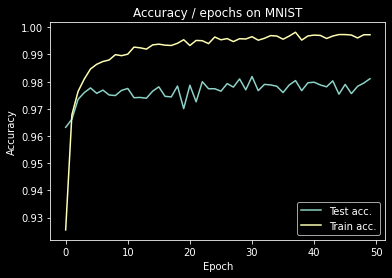

In [ ]:
plt.plot(test_accs['ReLU'], label='Test acc.')
plt.plot(train_accs['ReLU'], label='Train acc.')

plt.title('Accuracy / epochs on MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
#as we can see, we get the best performance with tha activation fun Tanh 

In [ ]:
# now , we will use the Tanh activation function and compare between diffrent number of layers 

In [222]:
class SimpleNN_2_layer(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN_2_layer, self).__init__()
        self.first_linear = nn.Linear(input_size, input_size // 2)
        self.second_linear = nn.Linear(input_size // 2, output_size)

        self.relu = nn.ReLU()
    
    def forward(self, x):
        out = self.first_linear(x)
        out = self.relu(out)
        out = self.second_linear(out)
        
        return out

In [223]:
model = SimpleNN_2_layer(input_size, output_size)
model = model.to(device)

criterion = nn.CrossEntropyLoss()

In [224]:
train_losses = []
test_losses = []

train_accs = []
test_accs = []

for epoch in range(num_epochs):
  agg_train_loss = 0
  agg_test_loss = 0

  agg_train_correct = 0
  agg_test_correct = 0

  # Training
  model.train(True)
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    images = images.view(images.shape[0], -1)

    # Forward + Backward + Optimize
    model.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()

    agg_train_loss += loss.item()
    _, predicted = torch.max(outputs.data, 1)
    agg_train_correct += (predicted == labels).sum()
    
    # Stochastic gradient descent
    for p in model.parameters():        
        p.data.add_(-learning_rate, p.grad.data)
  
  train_losses.append(agg_train_loss / len(train_loader))
  train_accs.append(agg_train_correct / len(train_dataset))

  # Testing
  model.train(False)
  with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
      images = images.to(device)
      labels = labels.to(device)

      images = images.view(images.shape[0], -1)

      # Forward only
      outputs = model(images)
      loss = criterion(outputs, labels)

      agg_test_loss += loss.item()

      _, predicted = torch.max(outputs.data, 1)
      agg_test_correct += (predicted == labels).sum()
  
  test_losses.append(agg_test_loss / len(test_loader))
  test_accs.append(agg_test_correct / len(test_dataset))
  

In [225]:
test_losses_by_layer={'2_layer':int,'3_layer':int,'4_layet':int}
test_accs_by_layer={'2_layer':int,'3_layer':int,'4_layet':int}
train_losses_by_layer={'2_layer':int,'3_layer':int,'4_layet':int}
train_accs_by_layer={'2_layer':int,'3_layer':int,'4_layet':int}

In [226]:

test_losses_by_layer['2_layer']=test_losses[len(test_losses)-1]
test_accs_by_layer['2_layer']=test_accs[len(test_accs)-1]
train_losses_by_layer['2_layer']=train_losses[len(train_losses)-1]
train_accs_by_layer['2_layer']=train_accs[len(train_accs)-1]

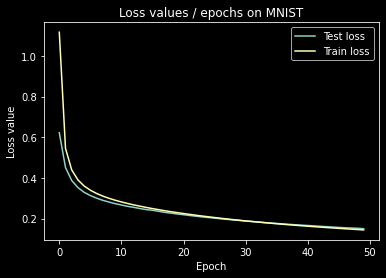

In [227]:
plt.plot(test_losses, label='Test loss')
plt.plot(train_losses, label='Train loss')

plt.title('Loss values / epochs on MNIST')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend()

plt.show()

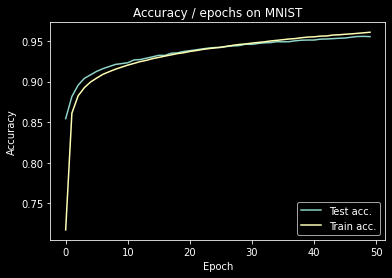

In [228]:
plt.plot(test_accs, label='Test acc.')
plt.plot(train_accs, label='Train acc.')

plt.title('Accuracy / epochs on MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [229]:
class SimpleNN_3_layer(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN_3_layer, self).__init__()
        self.first_linear = nn.Linear(input_size,128)
        self.second_linear = nn.Linear(128, 64)
        self.third_liner=nn.Linear(64, output_size)
         
        self.relu1=nn.ReLU()
        self.relu2=nn.Sigmoid()
          
        
    
    def forward(self, x):
        out = self.first_linear(x)
        out = self.relu1(out)
        out = self.second_linear(out)
        out = self.relu2(out)
        out = self.third_liner(out)
        return out

In [230]:
model = SimpleNN_3_layer(input_size, output_size)
model = model.to(device)

criterion = nn.CrossEntropyLoss()

In [231]:
train_losses = []
test_losses = []

train_accs = []
test_accs = []

for epoch in range(num_epochs):
  agg_train_loss = 0
  agg_test_loss = 0

  agg_train_correct = 0
  agg_test_correct = 0

  # Training
  model.train(True)
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    images = images.view(images.shape[0], -1)

    # Forward + Backward + Optimize
    model.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()

    agg_train_loss += loss.item()
    _, predicted = torch.max(outputs.data, 1)
    agg_train_correct += (predicted == labels).sum()
    
    # Stochastic gradient descent
    for p in model.parameters():        
        p.data.add_(-learning_rate, p.grad.data)
  
  train_losses.append(agg_train_loss / len(train_loader))
  train_accs.append(agg_train_correct / len(train_dataset))

  # Testing
  model.train(False)
  with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
      images = images.to(device)
      labels = labels.to(device)

      images = images.view(images.shape[0], -1)

      # Forward only
      outputs = model(images)
      loss = criterion(outputs, labels)

      agg_test_loss += loss.item()

      _, predicted = torch.max(outputs.data, 1)
      agg_test_correct += (predicted == labels).sum()
  
  test_losses.append(agg_test_loss / len(test_loader))
  test_accs.append(agg_test_correct / len(test_dataset))

In [232]:
test_losses_by_layer['3_layer']=test_losses[len(test_losses)-1]
test_accs_by_layer['3_layer']=test_accs[len(test_accs)-1]
train_losses_by_layer['3_layer']=train_losses[len(train_losses)-1]
train_accs_by_layer['3_layer']=train_accs[len(train_accs)-1]

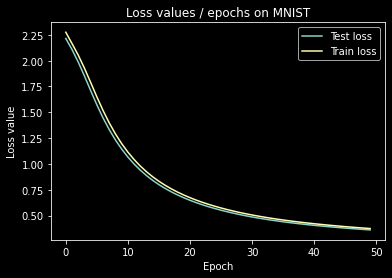

In [233]:
plt.plot(test_losses, label='Test loss')
plt.plot(train_losses, label='Train loss')

plt.title('Loss values / epochs on MNIST')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend()

plt.show()

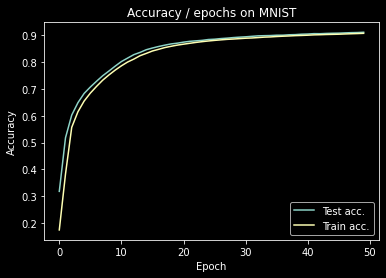

In [235]:
plt.plot(test_accs, label='Test acc.')
plt.plot(train_accs, label='Train acc.')

plt.title('Accuracy / epochs on MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [242]:
class SimpleNN_4_layer(nn.Module):
    def __init__(self, input_size, output_size):
          super(SimpleNN_4_layer, self).__init__()
          self.first_linear = nn.Linear(input_size,128)
          self.second_linear = nn.Linear(128, 64)
          self.third_liner=nn.Linear(64,32)
          self.Fourth_liner=nn.Linear(32, output_size)
          
          self.relu1=nn.ReLU()
          self.relu2=nn.Sigmoid()
          self.relu3=nn.Tanh()
    
    def forward(self, x):
        out = self.first_linear(x)
        out = self.relu1(out)
        out = self.second_linear(out)
        out = self.relu2(out)
        out = self.third_liner(out)
        out = self.relu3(out)
        out = self.Fourth_liner(out)
        
        return out

In [243]:
model = SimpleNN_4_layer(input_size, output_size)
model = model.to(device)

criterion = nn.CrossEntropyLoss()

In [244]:
train_losses = []
test_losses = []

train_accs = []
test_accs = []

for epoch in range(num_epochs):
  agg_train_loss = 0
  agg_test_loss = 0

  agg_train_correct = 0
  agg_test_correct = 0

  # Training
  model.train(True)
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    images = images.view(images.shape[0], -1)

    # Forward + Backward + Optimize
    model.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()

    agg_train_loss += loss.item()
    _, predicted = torch.max(outputs.data, 1)
    agg_train_correct += (predicted == labels).sum()
    
    # Stochastic gradient descent
    for p in model.parameters():        
        p.data.add_(-learning_rate, p.grad.data)
  
  train_losses.append(agg_train_loss / len(train_loader))
  train_accs.append(agg_train_correct / len(train_dataset))

  # Testing
  model.train(False)
  with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
      images = images.to(device)
      labels = labels.to(device)

      images = images.view(images.shape[0], -1)

      # Forward only
      outputs = model(images)
      loss = criterion(outputs, labels)

      agg_test_loss += loss.item()

      _, predicted = torch.max(outputs.data, 1)
      agg_test_correct += (predicted == labels).sum()
  
  test_losses.append(agg_test_loss / len(test_loader))
  test_accs.append(agg_test_correct / len(test_dataset))

In [245]:
test_losses_by_layer['4_layer']=test_losses[len(test_losses)-1]
test_accs_by_layer['4_layer']=test_accs[len(test_accs)-1]
train_losses_by_layer['4_layer']=train_losses[len(train_losses)-1]
train_accs_by_layer['4_layer']=train_accs[len(train_accs)-1]

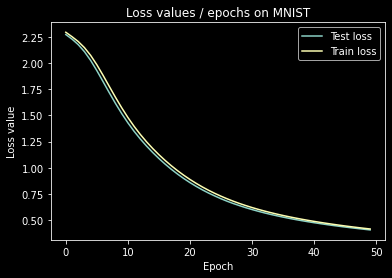

In [247]:
plt.plot(test_losses, label='Test loss')
plt.plot(train_losses, label='Train loss')

plt.title('Loss values / epochs on MNIST')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend()

plt.show()

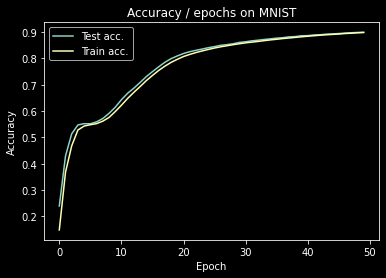

In [249]:
plt.plot(test_accs, label='Test acc.')
plt.plot(train_accs, label='Train acc.')

plt.title('Accuracy / epochs on MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
test_losses_by_layer['3_layer']

In [ ]:
##q2

In [ ]:
batch_size = 128
input_size = 28 * 28
output_size = 2
num_epochs = 400
learning_rate = 0.15

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data', 
                              train=False, 
                              transform=transforms.ToTensor(),  
                              download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)



In [ ]:
my_data = next(iter(train_loader))[0]
train_lable = torch.ones(128)*0.5
train_lable = torch.bernoulli(train_lable)
train_lable = train_lable.long()
test_label = torch.ones(len(test_dataset))*0.5
test_label = torch.bernoulli(test_label)
test_dataset.targets = test_label.long()

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.first_linear = nn.Linear(input_size, input_size // 2)
        self.second_linear = nn.Linear(input_size // 2, output_size)
        
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.first_linear(x)
        out = self.relu(out)
        out = self.second_linear(out)
        
        return out

In [ ]:
model = SimpleNN(input_size, output_size)
model = model.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.15, momentum=0.9)
criterion = nn.CrossEntropyLoss()

In [ ]:
train_losses = []
test_losses = []

train_accs = []
test_accs = []

for epoch in range(num_epochs):
  agg_train_loss = 0
  agg_test_loss = 0

  agg_train_correct = 0
  agg_test_correct = 0

  # Training
  model.train(True)
  images = my_data.to(device)
  labels = train_lable.to(device)

  images = images.view(images.shape[0], -1)

  # Forward + Backward + Optimize
  optimizer.zero_grad()
  outputs = model(images)
  loss = criterion(outputs, labels)
  loss.backward()

  agg_train_loss += loss.item()
  _, predicted = torch.max(outputs.data, 1)
  agg_train_correct += (predicted == labels).sum()

  # Stochastic gradient descent
  optimizer.step()
  for p in model.parameters():        
        p.data.add_(-learning_rate, p.grad.data)
  train_losses.append(agg_train_loss/ len(my_data))
  train_accs.append(agg_train_correct / len(my_data))

  # Testing
  model.train(False)
  with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
     
      images = images.to(device)
      labels = labels.to(device)

      images = images.view(images.shape[0], -1)

      # Forward only
      outputs = model(images)
      loss = criterion(outputs, labels)

      agg_test_loss += loss.item()

      _, predicted = torch.max(outputs.data, 1)
      agg_test_correct += (predicted == labels).sum()
  

  test_losses.append(agg_test_loss / len(test_loader))
  test_accs.append(agg_test_correct / len(test_dataset)) 

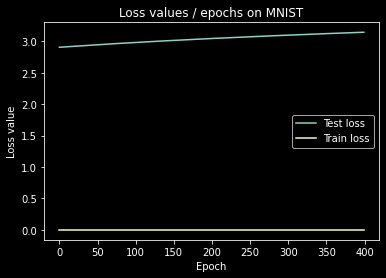

In [ ]:
plt.plot(test_losses, label='Test loss')
plt.plot(train_losses, label='Train loss')

plt.title('Loss values / epochs on MNIST')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend()

plt.show()

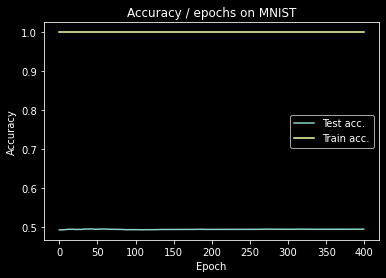

In [ ]:
plt.plot(test_accs, label='Test acc.')
plt.plot(train_accs, label='Train acc.')

plt.title('Accuracy / epochs on MNIST')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()